In [1]:
%matplotlib inline
import pandas as pd
import numpy as np


In [2]:
ls data

 Volume in drive C has no label.
 Volume Serial Number is 4A10-7505

 Directory of c:\cs439_2019\data

02/08/2019  03:45 PM    <DIR>          .
02/08/2019  03:45 PM    <DIR>          ..
02/08/2019  03:43 PM           710,518 BreadBasket_DMS.csv
               1 File(s)        710,518 bytes
               2 Dir(s)  69,269,315,584 bytes free


In [3]:
df = pd.read_csv('data/BreadBasket_DMS.csv')

In [4]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [5]:
df.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017BADCBAD30>]],
      dtype=object)

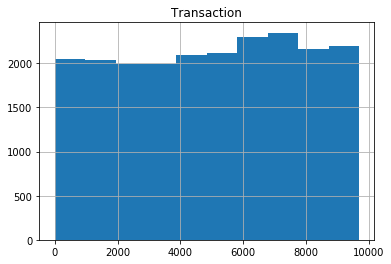

In [6]:
df.hist()

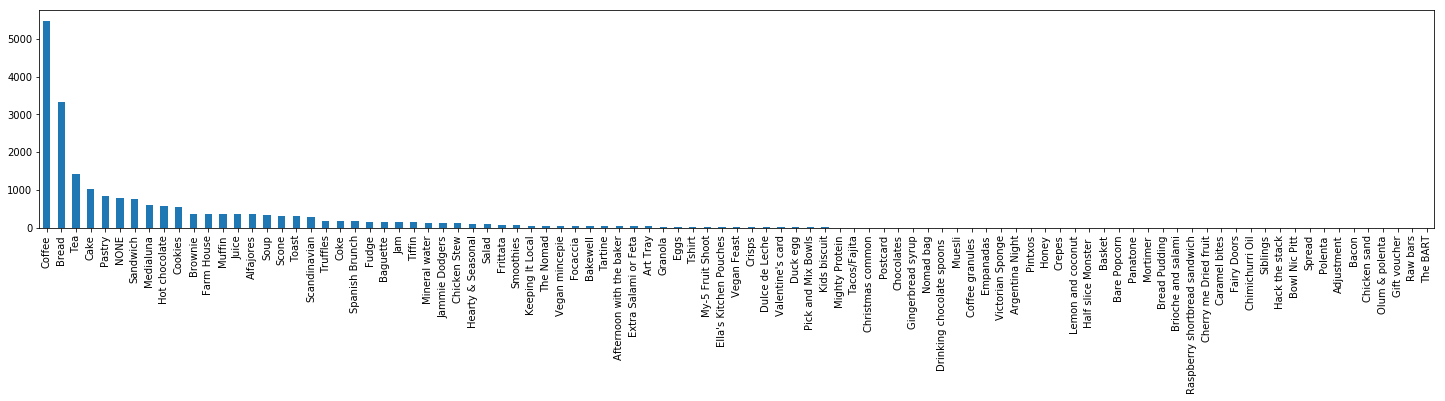

In [7]:
df['Item'].value_counts().plot(kind='bar',figsize=(25,4))

In [8]:
# อยากรู้กราฟนึงที่เป็น timeline 24hrs ตั้งแต่เที่ยงคืน 00.00 - 23.00 น. กาแฟคนสั่งเท่าไหร่

In [9]:
x = df.Time

In [10]:
from pytz import datetime

In [11]:
x = datetime.datetime.now()

In [12]:
y = datetime.datetime.now()

In [13]:
type(y-x)

datetime.timedelta

In [14]:
type(x)

datetime.datetime

In [15]:
y-x

datetime.timedelta(microseconds=19987)

In [16]:
x='2019-2-14'
datetime.datetime.strptime(x,'%Y-%m-%d')

datetime.datetime(2019, 2, 14, 0, 0)

In [17]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [18]:
df.Date[0]

'2016-10-30'

In [19]:
type(df.Date[0])

str

In [44]:

df['datetime'] = pd.to_datetime(df.Date+' '+df.Time,format='%Y-%m-%d %H:%M:%S')

df.dtypes


Date                   object
Time                   object
Transaction             int64
Item                   object
datetime       datetime64[ns]
hours                   int64
dtype: object

In [21]:
df.datetime[0]

Timestamp('2016-10-30 09:58:11')

In [22]:
df.head()

,Date,Time,Transaction,Item,datetime
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


In [23]:
x = datetime.datetime.now()
df['hours'] = df.datetime.apply(lambda x : x.hour)
df.head()

,Date,Time,Transaction,Item,datetime,hours
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,9
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,10
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,10
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,10
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,10


Text(0, 0.5, 'Cups')

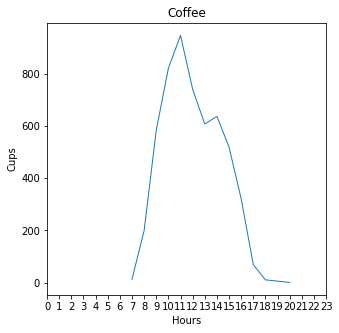

In [25]:
import matplotlib.pyplot as plt
a = pd.Series(data = df.loc[df['Item'] == 'Coffee']['hours'].value_counts(),index = range(0,24))
a.plot(kind='line',linewidth=1,figsize=(5,5),title="Coffee")\
    .set_xticks(range(24))
plt.xlabel('Hours')
plt.ylabel('Cups')

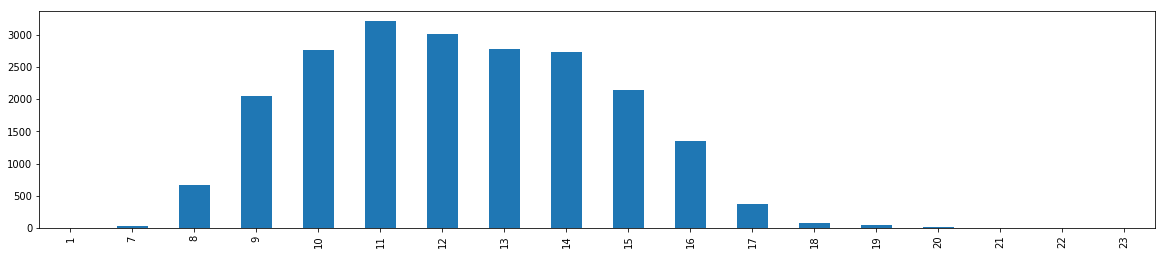

In [26]:
df['hours']\
    .astype('int')\
    .value_counts()\
    .sort_index()\
    .plot(kind='bar',figsize=(20,4))

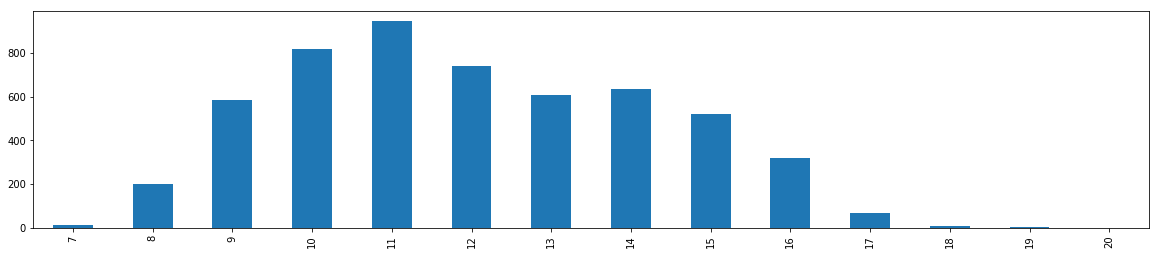

In [27]:
df[df.Item=='Coffee']['hours']\
    .astype('int')\
    .value_counts()\
    .sort_index()\
    .plot(kind='bar',figsize=(20,4))

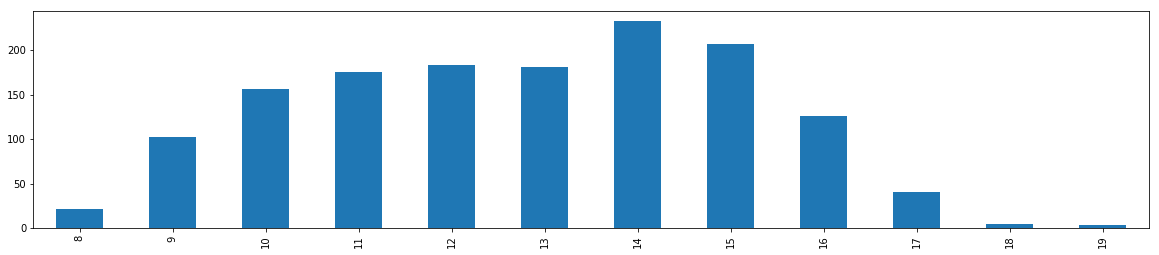

In [28]:
df[df.Item=='Tea']['hours']\
    .astype('int')\
    .value_counts()\
    .sort_index()\
    .plot(kind='bar',figsize=(20,4))

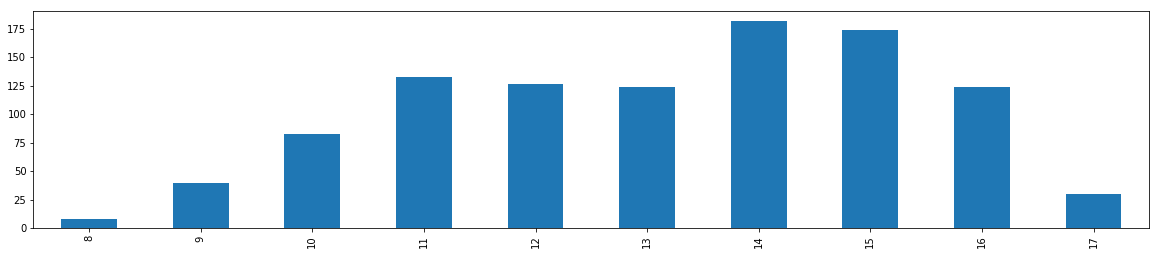

In [29]:
df[df.Item=='Cake']['hours']\
    .astype('int')\
    .value_counts()\
    .sort_index()\
    .plot(kind='bar',figsize=(20,4))

In [30]:
y = df\
    .groupby(['Transaction','Item'])\
    .agg({
    'Item' : ['count']
})
y.head(10)

Item
                          count
Transaction Item               
1           Bread             1
2           Scandinavian      2
3           Cookies           1
            Hot chocolate     1
            Jam               1
4           Muffin            1
5           Bread             1
            Coffee            1
            Pastry            1
6           Medialuna         1

In [31]:
z=y.loc[9684]
for i in z.iterrows():
    print (i[0])

Smoothies


In [32]:
d={}
for k in range(9684):
    try:
        z=y.loc[k]
        for i in z.iterrows():
            print (i[0])
            for j in z.iterrows():
                d[i[0]] = d.get(i[0],{j[0]:0}) 
                d[i[0]][j[0]] = d[i[0]].get(j[0],0)+1
            d[i[0]]['count'] = d[i[0]].get('count',0)+1
                #print(i[0],j[0])
    except:
        pass

Bread
Scandinavian
Cookies
Hot chocolate
Jam
Muffin
Bread
Coffee
Pastry
Medialuna
Muffin
Pastry
Coffee
Medialuna
Pastry
Tea
Bread
Pastry
Bread
Muffin
Medialuna
Scandinavian
Bread
Medialuna
NONE
Coffee
Jam
Pastry
Tartine
Tea
Basket
Bread
Coffee
Bread
Medialuna
Pastry
Mineral water
NONE
Scandinavian
Bread
Coffee
Medialuna
Hot chocolate
Farm House
Bread
Farm House
Bread
Medialuna
Bread
Coffee
Medialuna
Jam
Muffin
Scandinavian
Bread
Scandinavian
Fudge
Scandinavian
Bread
Coffee
Bread
Jam
NONE
Bread
Basket
Muffin
Scandinavian
Coffee
Coffee
Muffin
Muffin
Scandinavian
Bread
Tea
Bread
Coffee
NONE
Bread
Tea
Scandinavian
Coffee
Juice
Muffin
NONE
Tartine
Scandinavian
Bread
Tea
Fudge
Scandinavian
Coffee
Medialuna
Coffee
Hot chocolate
Medialuna
Coffee
Bread
Ella's Kitchen Pouches
Jam
Juice
Muffin
Coffee
Coffee
Medialuna
Bread
Victorian Sponge
Bread
Scandinavian
Bread
Coffee
Frittata
Hearty & Seasonal
Tea
Coffee
Frittata
Scandinavian
Hot chocolate
Soup
Tea
Victorian Sponge
NONE
Tea
Coffee
Cookies
Jui

My-5 Fruit Shoot
Scandinavian
Brownie
Coffee
Hot chocolate
NONE
Tartine
Bread
Brownie
Hot chocolate
Fudge
Jam
Coffee
Fudge
Cake
Coffee
Hearty & Seasonal
Mighty Protein
Tea
Coffee
Scandinavian
Cake
Scandinavian
Victorian Sponge
Cake
Tea
Coffee
Coffee
Bread
Frittata
Brownie
Coffee
My-5 Fruit Shoot
Fairy Doors
Focaccia
Coffee
NONE
Tea
Brownie
Hearty & Seasonal
Hot chocolate
Pick and Mix Bowls
Coffee
Frittata
Bread
Brownie
Frittata
Scandinavian
Bread
Farm House
Brownie
Jam
Pick and Mix Bowls
Soup
Coffee
Hearty & Seasonal
Tea
Bread
Bread
Frittata
Scandinavian
Coffee
Hot chocolate
NONE
Tartine
Coffee
Mighty Protein
Coffee
Frittata
Scandinavian
Coffee
Hearty & Seasonal
Mineral water
Scandinavian
Bread
Coffee
Bread
Coffee
Hearty & Seasonal
Soup
Brownie
Cake
Tea
Coffee
Mighty Protein
Brownie
Coffee
Soup
Tea
Cake
Cake
Coffee
Hot chocolate
Coffee
Hearty & Seasonal
Coffee
Brownie
Coffee
Frittata
Brownie
Coke
Frittata
Mineral water
Sandwich
Granola
Scandinavian
Coffee
Coke
Brownie
Cake
Tea
Fudge
Co

Hot chocolate
Medialuna
Pastry
Coffee
Bread
Jam
Medialuna
Bread
Medialuna
NONE
Coffee
Coffee
Bread
Coffee
Muffin
Bread
Medialuna
Bread
Bread
Medialuna
Brownie
Coffee
Pastry
Medialuna
Scandinavian
Bread
Coffee
Muffin
Bread
NONE
Coffee
Medialuna
Muffin
Bread
Coffee
Alfajores
Bread
Scandinavian
Coffee
Bread
Medialuna
Coffee
Scandinavian
Brownie
Coffee
Muffin
Tea
Truffles
Coffee
NONE
Tartine
Coffee
Alfajores
Scandinavian
Coffee
Hot chocolate
Medialuna
NONE
Alfajores
Coffee
Muffin
Brownie
Coffee
Farm House
Muffin
Bread
Coffee
Farm House
Medialuna
Farm House
Scandinavian
Bread
Coffee
Truffles
Coffee
Frittata
Soup
Eggs
Scandinavian
Brownie
Coffee
Truffles
Scandinavian
Coke
Alfajores
Coffee
Sandwich
Soup
Hearty & Seasonal
Juice
Tea
Truffles
Brownie
Coffee
Muffin
NONE
Bread
Bowl Nic Pitt
Coffee
Frittata
Muffin
Brownie
Coffee
Frittata
Soup
Tea
Alfajores
Coffee
Hot chocolate
Muffin
Alfajores
Coffee
Keeping It Local
NONE
Scandinavian
Tea
Bread
Fudge
Farm House
Farm House
Brownie
Coffee
Muffin
Brea

Truffles
Bread
Brownie
Coffee
Bread
Coffee
Brownie
Medialuna
Tea
Bread
Scandinavian
Alfajores
Cake
Hot chocolate
Medialuna
Truffles
Brownie
Coffee
Medialuna
Coffee
Medialuna
Truffles
Cake
Tea
Cake
Cookies
Hot chocolate
Mineral water
Cookies
Bread
Cake
Hot chocolate
Bread
Farm House
Truffles
Tea
Farm House
Coffee
Coffee
Bread
Coffee
Coffee
Bread
Pastry
Coffee
Coffee
Farm House
Coffee
Keeping It Local
Coffee
Medialuna
Coffee
Coffee
Pastry
Tea
Coffee
Keeping It Local
Coffee
Pastry
Smoothies
Coffee
Medialuna
Muffin
Coffee
NONE
Coffee
Coffee
Brownie
Coffee
Farm House
Tea
Coffee
Bread
Coffee
Keeping It Local
NONE
NONE
Tea
Bread
Coffee
Farm House
Coffee
Sandwich
Farm House
Scandinavian
Coffee
Cake
Coffee
Bread
NONE
Tea
Truffles
Bread
Fudge
Medialuna
Pastry
Bread
Brownie
Cake
Tea
Juice
Medialuna
Cake
Tea
Bread
Coffee
Medialuna
Sandwich
Tea
Alfajores
Coffee
Coffee
Cookies
Keeping It Local
My-5 Fruit Shoot
Alfajores
Bread
Hot chocolate
Bread
Farm House
Coffee
Juice
Pastry
Cookies
Brownie
Coffee


Coffee
Scandinavian
Bread
Coffee
Medialuna
Pastry
Bread
Scandinavian
Coffee
Scone
Coffee
Bread
Bread
Pastry
Bread
Coffee
Bread
Bread
Coffee
Coffee
Scone
Cake
Coffee
Bread
Fudge
Bread
Farm House
Medialuna
Muffin
Scone
Coffee
NONE
Alfajores
Coffee
Scone
Coffee
Scone
Tea
Cake
Juice
Tea
Coffee
Fudge
Jam
NONE
Tartine
Bread
Coffee
Medialuna
Bread
NONE
Tea
Coke
NONE
Coffee
Medialuna
Bread
Bread
Truffles
Bread
Cake
Coffee
NONE
Pastry
Tea
Sandwich
Hot chocolate
Coffee
Sandwich
NONE
Coffee
NONE
Sandwich
Tea
Coffee
Scone
Cake
Bread
Cookies
Coffee
Sandwich
Cake
Coffee
Scone
Bread
Mineral water
Bread
Coffee
Cake
Muffin
Scone
Scone
Tea
Muffin
Pastry
Cake
Coffee
Muffin
Cake
Bread
Cake
Scone
Tea
Coffee
Medialuna
Fudge
Jam
Pastry
Scone
Fudge
Hot chocolate
Cake
Coffee
Juice
Sandwich
Bread
Coffee
Juice
Bread
Coffee
Hot chocolate
Scone
Coffee
Hot chocolate
Muffin
Scone
Bread
Medialuna
Alfajores
Cake
Hot chocolate
Coffee
Coffee
Coffee
Tea
Bread
Cake
Coffee
Jam
Coffee
Scone
Tea
Bread
Bread
Hot chocolate
Muf

Vegan mincepie
Bread
Alfajores
Muffin
Coffee
Jammie Dodgers
Bread
Jammie Dodgers
Bread
Cake
Coffee
Jammie Dodgers
Tea
Coffee
NONE
Bread
Medialuna
NONE
Pastry
Alfajores
Pastry
Coffee
Medialuna
NONE
Toast
Bread
Pastry
Tea
Bread
Coffee
Bread
Hot chocolate
Bread
Pastry
Coffee
NONE
Bread
Coffee
Hot chocolate
Farm House
Coffee
Coffee
Coffee
Dulce de Leche
Farm House
Pastry
Bread
Vegan mincepie
Bread
Coffee
Hot chocolate
Pastry
Coffee
Pastry
Vegan mincepie
Bread
Bread
Coffee
Hot chocolate
Bread
Coffee
Sandwich
Bread
Coffee
Hot chocolate
Coffee
Coffee
Coke
Sandwich
Coffee
Bread
Coffee
NONE
Bread
Coffee
Coffee
Coffee
Fudge
Bread
Coffee
Sandwich
Tea
Coffee
NONE
Sandwich
Bread
Bread
Coffee
NONE
Coffee
Hot chocolate
Fudge
Coffee
Bread
Coffee
Bread
Cookies
Bread
Alfajores
Bread
Coffee
Tea
Bare Popcorn
Ella's Kitchen Pouches
Farm House
Bread
Fudge
Pastry
Hot chocolate
Coffee
Jammie Dodgers
Medialuna
Tea
Vegan mincepie
Coffee
Coffee
Hot chocolate
Bread
Vegan mincepie
Dulce de Leche
Medialuna
Muesli
M

Coffee
Toast
Bread
Cake
Pastry
Coffee
Cookies
Juice
NONE
Coffee
Medialuna
Pastry
Bread
NONE
Bread
Bread
Farm House
Focaccia
Bread
Bread
Medialuna
Pastry
Coffee
Scone
Hot chocolate
Pastry
Scone
Tea
Cake
Coffee
Crisps
Hot chocolate
Coffee
Hot chocolate
Bread
Hot chocolate
Pastry
Frittata
Scone
Bread
Pastry
Hot chocolate
Bread
Coffee
Bread
Bread
NONE
Toast
Coke
Juice
Tea
Coffee
Hot chocolate
NONE
Sandwich
Farm House
Cake
Coffee
Farm House
Hot chocolate
Medialuna
Pastry
Tea
Coffee
Fudge
Jam
Pastry
Bread
Coke
Farm House
Coffee
Hot chocolate
Pastry
Focaccia
Medialuna
Coffee
Cake
Coffee
Art Tray
Hot chocolate
Juice
NONE
Sandwich
Toast
Scone
Bread
Scandinavian
Bread
Scone
Coffee
Medialuna
Tea
Coffee
Cookies
Hot chocolate
Medialuna
Cookies
Coke
Frittata
Sandwich
Tea
Coffee
Cookies
Medialuna
Bread
Coffee
Sandwich
Bread
Coffee
Sandwich
Cake
Coffee
NONE
Coffee
Coffee
Sandwich
Focaccia
Fudge
Jam
Bread
Medialuna
Coffee
Tea
Coffee
Focaccia
Fudge
Panatone
Coffee
Coke
NONE
Farm House
Scandinavian
Cooki

Coffee
Scone
Coffee
Cake
Coffee
Farm House
Scandinavian
Toast
Bread
Coffee
NONE
NONE
NONE
Coffee
Farm House
NONE
NONE
Sandwich
Tea
Muffin
NONE
NONE
NONE
Coffee
Sandwich
Scone
Farm House
Sandwich
Bread
Coffee
NONE
Tea
Sandwich
NONE
Coke
NONE
Jammie Dodgers
Frittata
Muffin
Pastry
Scone
Cake
Coffee
Pastry
Cake
NONE
Coffee
Hearty & Seasonal
NONE
Tea
Bread
Fudge
Coffee
Bread
Cake
Coffee
Coffee
Coffee
NONE
Tea
Bread
Bread
Bread
Coffee
Muffin
Toast
Coffee
Hot chocolate
Medialuna
Bread
Bread
Pastry
Bread
NONE
Coffee
Sandwich
Tea
Coffee
Coffee
Farm House
Medialuna
NONE
Coffee
Muffin
Coffee
Hot chocolate
Coffee
Muffin
Tea
Tiffin
Toast
Bread
Cookies
Farm House
Bread
Granola
Coffee
Scone
Bread
NONE
Coffee
Medialuna
Coffee
Muffin
Pastry
Coffee
Hot chocolate
Bread
Bread
NONE
Bread
Coffee
Bread
NONE
Coffee
Hearty & Seasonal
Bread
Art Tray
Bread
Coffee
NONE
Sandwich
Bread
Cake
NONE
Alfajores
Muffin
Tea
Tiffin
Coffee
NONE
Scandinavian
Afternoon with the baker
Cake
Bread
Bread
Cake
Coffee
Scandinavian
T

Soup
Bread
Soup
Tea
Cake
Frittata
Cake
Coffee
Tea
Cake
Cookies
Cake
NONE
Tea
Cake
Cookies
Cake
Coffee
Cookies
Sandwich
Soup
Tea
Cookies
Tea
Bread
Cake
Coke
Crisps
Sandwich
Coffee
Soup
Bread
Cake
Spanish Brunch
Tea
Coffee
Bread
Coffee
Coffee
Bread
Coffee
Bread
Cake
Coffee
Coffee
Medialuna
Cake
Cake
Coffee
Soup
Alfajores
Coffee
Chicken Stew
Coffee
Juice
Cake
Coffee
Hot chocolate
Cookies
Hot chocolate
Tea
Toast
Coffee
Cake
Coffee
Cookies
Hot chocolate
Cake
Hot chocolate
Bread
Bread
Bread
Coffee
Pastry
Coffee
Coffee
Focaccia
Scandinavian
Bread
Coffee
Coffee
Coffee
Coffee
Bread
Cookies
Scandinavian
Scandinavian
Scandinavian
Farm House
Coffee
Bread
Farm House
Coffee
Vegan mincepie
Coffee
Bread
Coffee
Medialuna
Coffee
Muffin
Pastry
Tea
Cake
Chicken Stew
Tea
Soup
Bread
Coffee
Salad
Spanish Brunch
Coke
NONE
NONE
Tea
Chicken Stew
Bread
Art Tray
Coffee
Soup
Tea
Bread
Coffee
Cookies
Focaccia
Medialuna
Bread
Soup
Art Tray
Bread
Chicken Stew
Coffee
Coke
Pastry
Truffles
Bread
Focaccia
Frittata
Tea
Ar

Coffee
Farm House
Cake
Farm House
Coffee
Coffee
Bread
Coffee
Pastry
Bread
Bread
NONE
Toast
Truffles
Bread
NONE
Jam
Coffee
NONE
Coffee
Bread
Coffee
Cake
Coffee
Tea
Brownie
Coffee
Farm House
Coffee
Coffee
Sandwich
Farm House
Pastry
Tea
Truffles
Bread
Bread
Hot chocolate
Baguette
Bread
Bread
Bread
Farm House
Scandinavian
Bread
Pastry
Sandwich
Baguette
Bread
Cake
Coffee
Hot chocolate
Coffee
Pastry
Coffee
Brownie
Cake
Coffee
NONE
Coffee
Cookies
Granola
Pastry
Scone
Tea
The Nomad
Coffee
Bread
Cookies
Fudge
Alfajores
Scandinavian
Coffee
Scone
Bread
Coffee
Pastry
Alfajores
Pastry
Tea
Coffee
Pastry
Sandwich
Cake
Bread
Medialuna
Brownie
Cake
Coffee
Cake
Coffee
Cookies
NONE
Smoothies
Tea
Coffee
Tea
Truffles
Bread
Brownie
Coffee
Spanish Brunch
Scandinavian
Cookies
Bread
Coffee
Mineral water
Coffee
Juice
NONE
Spanish Brunch
Toast
Scone
Sandwich
Tea
Brownie
Coffee
NONE
Bread
Coffee
Sandwich
Bread
Chicken Stew
Coffee
Sandwich
Soup
Cake
Coffee
Salad
Sandwich
Cake
Coffee
Cake
Scone
Cake
Coffee
Scone
Br

Brownie
Coffee
Baguette
Coffee
Alfajores
Bread
Hot chocolate
Medialuna
Alfajores
Cake
Medialuna
Pastry
Coffee
Cake
Coffee
Cookies
Duck egg
Hot chocolate
NONE
Spanish Brunch
Coffee
Pastry
Sandwich
Smoothies
Soup
Chicken Stew
Coffee
Jammie Dodgers
Juice
Tea
Chicken Stew
Hot chocolate
Juice
Tea
Toast
Coffee
Coffee
Pastry
Cake
Coffee
Cookies
Coffee
Fudge
Alfajores
Brownie
Cake
Coffee
Cake
NONE
Soup
Tea
Hot chocolate
Sandwich
Afternoon with the baker
Soup
Tea
Truffles
Brownie
Cake
Coffee
Sandwich
Cookies
Coffee
Coffee
Extra Salami or Feta
Juice
Salad
Toast
Alfajores
Coffee
Muffin
Pastry
Bread
Baguette
Afternoon with the baker
Brownie
Cookies
Cookies
Farm House
Baguette
Cake
Cake
Bread
Coffee
Medialuna
Tea
Bread
Coffee
Bread
Coffee
Medialuna
Pastry
Bread
Coffee
Jammie Dodgers
Coffee
Spanish Brunch
Tea
Bread
Coffee
Spanish Brunch
Coffee
Cookies
Tea
Bread
Baguette
Scandinavian
Farm House
Bread
Cake
Coffee
Cookies
Bread
Coffee
Scone
Tea
Coffee
Cake
Tea
Coffee
Pastry
Farm House
Bread
Coke
Juice


Bread
Coffee
Mineral water
Soup
Bread
Pastry
Cookies
Tea
Coffee
Coffee
Coffee
Coke
Sandwich
Soup
Coffee
Farm House
Baguette
Pastry
Scandinavian
Hot chocolate
NONE
Sandwich
Tea
Coffee
Cake
Tea
Alfajores
Coffee
Pastry
Coffee
Hot chocolate
Coffee
Coffee
Sandwich
Alfajores
Bread
Spanish Brunch
Tea
Coffee
Cookies
Hot chocolate
Cake
Coffee
Cookies
Tea
Bread
Cake
Coffee
Smoothies
Bread
Bread
Vegan Feast
Cake
Coffee
Hot chocolate
Pastry
Tea
Cake
Coffee
Hot chocolate
Bread
Coffee
Tea
Coffee
Coffee
Coffee
Tea
Toast
Coffee
Bread
Alfajores
Coffee
Juice
Pastry
Baguette
Coffee
Cake
Coffee
Pastry
Coffee
Tea
Bread
Pastry
Bread
Pastry
Baguette
Coffee
Vegan mincepie
Baguette
Bread
Coffee
Tea
Cake
Coffee
Juice
Toast
Hot chocolate
Truffles
Coffee
Toast
Hot chocolate
NONE
Bread
NONE
Tea
Chicken Stew
Chicken Stew
Bread
Chicken Stew
Soup
Tea
Bread
Pastry
Mineral water
NONE
Salad
Coffee
Duck egg
NONE
Sandwich
Soup
Truffles
Bread
Coffee
Hot chocolate
Sandwich
Bread
Cake
Chicken Stew
Coffee
Soup
Tea
Coffee
Cook

Spanish Brunch
Coffee
Pastry
Sandwich
Soup
Muffin
Tea
Tiffin
Bread
Coffee
Bread
Bread
Cookies
Hot chocolate
Bread
Cake
Jammie Dodgers
Juice
Bread
Scone
Bread
Hot chocolate
Tea
Tiffin
Bread
Coffee
Coffee
Cake
Coffee
Granola
NONE
Sandwich
Scone
Pastry
Sandwich
Coffee
Sandwich
Bread
Cake
Pastry
Pastry
Bread
Brownie
Coffee
Drinking chocolate spoons 
Sandwich
Coffee
Sandwich
Bread
Jammie Dodgers
Cake
Tea
Coffee
Juice
Muffin
Salad
Tea
Spanish Brunch
Tea
Cake
Chicken Stew
Medialuna
Sandwich
Spanish Brunch
Toast
Bread
Bread
Soup
Bread
Coffee
Juice
Scone
Coffee
NONE
Scone
Toast
Bread
Bread
Cake
Brownie
Coke
Coffee
Sandwich
Bread
Cake
Jammie Dodgers
Bread
Coffee
Scone
Cake
Coffee
Scone
Coffee
NONE
Sandwich
Argentina Night
Vegan Feast
Cake
Coffee
Cake
Tea
Cake
Scone
Tea
Bread
Bread
Coffee
Cake
Coffee
Coffee
Coffee
Bread
Cookies
Juice
Muffin
Coffee
Duck egg
NONE
Tea
The Nomad
Coffee
Muffin
Cake
Coffee
Hot chocolate
Scone
Coffee
Pastry
Coffee
Pastry
Bread
Scone
Bread
Brownie
Coffee
Sandwich
Cake
Co

Pastry
Bread
Scandinavian
Bread
Coffee
Coffee
Toast
Coffee
Coffee
Pastry
Coffee
Cake
Cookies
Mineral water
Coffee
Toast
Baguette
Farm House
Cake
Coffee
Tea
Coffee
Farm House
Coffee
Bread
Coffee
Muffin
Christmas common
Coffee
Sandwich
Soup
Mineral water
Sandwich
Bread
Bread
Coffee
Farm House
Sandwich
Spanish Brunch
Cake
Coffee
Coffee
Soup
Tea
Coffee
Cookies
Coffee
Sandwich
Bread
Coffee
Jam
Bread
Cake
Coffee
Sandwich
NONE
Truffles
Coffee
NONE
Truffles
Coffee
Sandwich
Soup
Coffee
Sandwich
Tea
Coffee
Sandwich
Tea
Coffee
Cookies
Baguette
Bread
Coffee
Muffin
Bread
Christmas common
Bread
Cake
Coffee
Cookies
Coffee
Bread
Bread
Cake
Coffee
Coffee
Cookies
Half slice Monster 
Juice
Bread
Coffee
Bread
Bread
Muffin
Tea
Baguette
Farm House
Coffee
Cookies
Bread
Brownie
Coffee
NONE
Coffee
Sandwich
Cherry me Dried fruit
Coffee
Coffee
Coffee
Coke
Muffin
Pastry
Bread
Brownie
Coffee
Scandinavian
Coffee
Pastry
Coffee
Baguette
Farm House
Bread
Bread
Coffee
Toast
Coffee
Cookies
Tea
Smoothies
Tea
Farm House
C

Tiffin
Bread
Coffee
Coffee
Coffee
Cake
Coffee
Cookies
Cake
Coffee
Hot chocolate
Coffee
Pastry
Coffee
Muffin
Bread
Coffee
Coffee
Coffee
Medialuna
NONE
Bread
Coffee
Cookies
Tea
Bread
Coffee
Bread
Coffee
Brownie
Cake
Bread
Farm House
Cake
Pastry
Bread
Coffee
Fudge
NONE
Sandwich
Scandinavian
Bread
Coffee
Jammie Dodgers
Juice
Tiffin
Bread
Coffee
Sandwich
Spanish Brunch
Crisps
Sandwich
Truffles
Bread
Coke
Farm House
Muffin
NONE
Sandwich
Tea
Bread
Coffee
Pastry
Alfajores
Cake
Pastry
Scone
Cake
Coffee
Argentina Night
Soup
Cake
Smoothies
Cake
Bread
Pastry
Truffles
Bread
Coffee
NONE
Scone
Tea
Bread
Cake
Sandwich
Coffee
Sandwich
Cake
Coffee
Coffee
Juice
NONE
Spanish Brunch
Cake
Coffee
Sandwich
Cookies
Cake
Tea
Bread
Cake
Cookies
Juice
Farm House
Coffee
Bread
Coffee
Coffee
Tea
Coffee
NONE
Coffee
Pastry
Sandwich
Bread
Scone
Coffee
Granola
Toast
Cake
Coffee
Pastry
Tea
Farm House
Coffee
NONE
Coffee
Pastry
Bread
Coffee
Pastry
Truffles
Bread
Coffee
Coffee granules 
The Nomad
Bread
Bread
Cookies
Bread
T

In [33]:
d['Cookies']['count']

515

In [34]:
def prob(a,b):
    global d
    p = d[a][b]/d[b]['count']
    return p

In [35]:
prob('Cake','Tea')

0.16666666666666666

In [36]:
prob('Tea','Cake')

0.2288911495422177